In [56]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, auc, plot_roc_curve,ConfusionMatrixDisplay
from sklearn.metrics import roc_curve, roc_auc_score, balanced_accuracy_score, classification_report
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from lightgbm import LGBMRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from matplotlib.image import imread
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
import statsmodels as sm
from statsmodels.graphics.tsaplots import plot_acf
from sklearn.metrics import mean_absolute_error as mae, mean_squared_error as mse, mean_absolute_percentage_error as mape
from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings('ignore')

In [57]:
#Read in datasets
dff = pd.read_csv("actions2load.csv")

In [58]:
# display each dataset
dff.head (6)

,account_id,event_time,event_type,product_id,additional_data
0,608aa5969cef2edc29cb0c46deaec9da,2019-11-29 12:10:08.154,DashboardLivebookLinkOpened,1156,/book/learn-dbatools-in-a-month-of-lunches
1,d07263602248aa70ce1967d6f98f9506,2019-11-29 12:10:19.962,ReadingOwnedBook,610,60s
2,b7d5902d66127909d0f9d766a841ebb5,2019-11-29 12:11:20.707,ReadingOwnedBook,1172,480s
3,d07263602248aa70ce1967d6f98f9506,2019-11-29 12:11:41.283,ProductTocLivebookLinkOpened,1066,/book/grokking-machine-learning/chapter-1
4,89f7601cb558e1c47b00a7fabb6a466c,2019-11-29 12:11:58.253,ReadingOwnedBook,1073,960s
5,eaecfa7b11e62308832d07ac94dcda6a,2019-11-29 12:12:00.402,ReadingOwnedBook,887,60s


In [59]:
# get the shape of datasets
dff.shape

(3242076, 5)

In [5]:
# get iformation about the data
dff.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3242076 entries, 0 to 3242075
Data columns (total 5 columns):
 #   Column           Dtype 
---  ------           ----- 
 0   account_id       object
 1   event_time       object
 2   event_type       object
 3   product_id       int64 
 4   additional_data  object
dtypes: int64(1), object(4)
memory usage: 123.7+ MB


In [6]:
# description of the datasets
dff.describe()

,product_id
count,3.242076e+06
mean,5.153777e+02
std,4.912778e+02
min,-1.000000e+00
25%,-1.000000e+00
50%,6.130000e+02
75%,9.710000e+02
max,1.838000e+03


In [11]:
#check for data types
dff.dtypes

account_id         object
event_time         object
event_type         object
product_id          int64
additional_data    object
dtype: object

In [7]:
#check for columns in the datasets
dff.columns

Index(['account_id', 'event_time', 'event_type', 'product_id',
       'additional_data'],
      dtype='object')

In [9]:
# check for the unique 'account_id' in the datasets
dff['account_id'].unique()

array(['608aa5969cef2edc29cb0c46deaec9da',
       'd07263602248aa70ce1967d6f98f9506',
       'b7d5902d66127909d0f9d766a841ebb5', ...,
       '861f5d79a9348e0ceaf2a5531b2dd92e',
       '75713c220d80f391f2e2360cefec11df',
       '65671ae265025ff94d1b72899f7dece7'], dtype=object)

In [10]:
# check for the number of unique 'account_id' in the datasets
dff['account_id'].nunique()

89467

In [12]:
# check for the unique 'event_time' in the datasets
dff['event_time'].unique()

array(['2019-11-29 12:10:08.154', '2019-11-29 12:10:19.962',
       '2019-11-29 12:11:20.707', ..., '2020-06-04 04:19:59.613',
       '2020-06-04 04:19:59.612', '2020-06-04 04:20:13.271'], dtype=object)

In [13]:
# check for the number of unique 'event_time' in the datasets
dff['event_time'].nunique()

2940583

In [16]:
# check for the number of unique 'product_id' in the datasets
dff['product_id'].nunique()

740

In [17]:
# check for the unique 'event_type' in the datasets
dff['event_type'].unique()

array(['DashboardLivebookLinkOpened', 'ReadingOwnedBook',
       'ProductTocLivebookLinkOpened', 'ReadingOpenChapter',
       'HighlightCreated', 'BookmarkCreated', 'ReadingFreePreview',
       'ProductLookInsideLivebookLinkOpened', 'SearchResultOpened',
       'SearchMade', 'ProductLiveaudioUpsell', 'WishlistItemAdded',
       'OrderConfirmationLivebookLinkOpened', 'CrossReferenceTermOpened',
       'ExerciseSolved', 'UpvoteGiven', 'ShareableLinkOpened',
       'ShareableLinkCreated', 'NoteCreated', 'ProductSeeFreeLinkOpened',
       'LivebookLogin', 'EBookDownloaded', 'EBookRegistration',
       'FreeContentCheckout', 'UnknownOriginLivebookLinkOpened',
       'AddProductOffering', 'RemoveProductOffering', 'AddOrUpdateCoupon',
       'GoToManningShoppingCart', 'FirstManningAccess',
       'FirstLivebookAccess', 'LivebookRegistration',
       'LivebookAccountConfirmation', 'SherlockHolmesClueFound',
       'CommentCreated'], dtype=object)

In [18]:
# check for the number of unique 'event_type' in the datasets
dff['event_type'].nunique()

35

In [19]:
# value count of each evet_type
dff['event_type'].value_counts()

ReadingOwnedBook                       748260
FirstLivebookAccess                    658226
FirstManningAccess                     657340
EBookDownloaded                        277356
ReadingFreePreview                     138197
HighlightCreated                       121643
FreeContentCheckout                    116183
ReadingOpenChapter                     100004
ProductTocLivebookLinkOpened            88130
LivebookLogin                           62484
DashboardLivebookLinkOpened             48308
WishlistItemAdded                       37609
CrossReferenceTermOpened                34094
SearchMade                              27861
SearchResultOpened                      24228
ProductLookInsideLivebookLinkOpened     22987
BookmarkCreated                         10900
EBookRegistration                        8842
LivebookRegistration                     7702
LivebookAccountConfirmation              7309
ExerciseSolved                           6971
OrderConfirmationLivebookLinkOpene

In [60]:
#check for missing values
dff.isnull().sum()

account_id              0
event_time              0
event_type              0
product_id              0
additional_data    516123
dtype: int64

In [61]:
# handle missing values
dff.drop('additional_data',axis=1, inplace=True)

In [62]:
#Convert event_time column to datetime format
dff['event_time'] = pd.to_datetime(df['event_time'])

In [63]:
#check for data types
dff.dtypes

account_id            object
event_time    datetime64[ns]
event_type            object
product_id             int64
dtype: object

In [64]:
#creating event_date column from event_time
dff['event_date'] = (df['event_time']).dt.date

In [65]:
#creating time_event column from event_time
dff['time_event'] = (df['event_time']).dt.time

In [66]:
#Convert event_time column to datetime format
dff['event_date'] = pd.to_datetime(df['event_date'])

In [67]:
dff.head(6)

,account_id,event_time,event_type,product_id,event_date,time_event
0,608aa5969cef2edc29cb0c46deaec9da,2019-11-29 12:10:08.154,DashboardLivebookLinkOpened,1156,2019-11-29,12:10:08.154000
1,d07263602248aa70ce1967d6f98f9506,2019-11-29 12:10:19.962,ReadingOwnedBook,610,2019-11-29,12:10:19.962000
2,b7d5902d66127909d0f9d766a841ebb5,2019-11-29 12:11:20.707,ReadingOwnedBook,1172,2019-11-29,12:11:20.707000
3,d07263602248aa70ce1967d6f98f9506,2019-11-29 12:11:41.283,ProductTocLivebookLinkOpened,1066,2019-11-29,12:11:41.283000
4,89f7601cb558e1c47b00a7fabb6a466c,2019-11-29 12:11:58.253,ReadingOwnedBook,1073,2019-11-29,12:11:58.253000
5,eaecfa7b11e62308832d07ac94dcda6a,2019-11-29 12:12:00.402,ReadingOwnedBook,887,2019-11-29,12:12:00.402000


In [68]:
#Creating event_year column from event_date
dff['event_year'] = dff['event_date'].dt.year

In [69]:
# creating event_month column from event_date
dff['event_month'] = dff['event_date'].dt.month

In [70]:
# creating event_day column from event_date
dff['event_day'] = dff['event_date'].dt.day

In [71]:
#creating event_day_name column from event_date
dff['event_day_name'] = dff['event_date'].dt.day_name()

In [72]:
#creating event_hours column from event_time
dff['event_hour'] = dff['event_time'].dt.hour

In [73]:
dff.head(6)

,account_id,event_time,event_type,product_id,event_date,time_event,event_year,event_month,event_day,event_day_name,event_hour
0,608aa5969cef2edc29cb0c46deaec9da,2019-11-29 12:10:08.154,DashboardLivebookLinkOpened,1156,2019-11-29,12:10:08.154000,2019,11,29,Friday,12
1,d07263602248aa70ce1967d6f98f9506,2019-11-29 12:10:19.962,ReadingOwnedBook,610,2019-11-29,12:10:19.962000,2019,11,29,Friday,12
2,b7d5902d66127909d0f9d766a841ebb5,2019-11-29 12:11:20.707,ReadingOwnedBook,1172,2019-11-29,12:11:20.707000,2019,11,29,Friday,12
3,d07263602248aa70ce1967d6f98f9506,2019-11-29 12:11:41.283,ProductTocLivebookLinkOpened,1066,2019-11-29,12:11:41.283000,2019,11,29,Friday,12
4,89f7601cb558e1c47b00a7fabb6a466c,2019-11-29 12:11:58.253,ReadingOwnedBook,1073,2019-11-29,12:11:58.253000,2019,11,29,Friday,12
5,eaecfa7b11e62308832d07ac94dcda6a,2019-11-29 12:12:00.402,ReadingOwnedBook,887,2019-11-29,12:12:00.402000,2019,11,29,Friday,12


In [74]:
#Time period function

def TimePeriod(hour):
    if 0 < hour < 6:
        period = "Early hours"
    elif 5 < hour < 12:
        period = "Morning"
    elif 11 < hour < 17:
        period = "Afternoon"
    elif 16 < hour < 20:
        period = "Evening"
    else:
        period = "Night"
    return period

In [77]:
dff['period of day'] = dff['event_hour'].apply(TimePeriod)

In [78]:
dff.head(6)

,account_id,event_time,event_type,product_id,event_date,time_event,event_year,event_month,event_day,event_day_name,event_hour,period of day
0,608aa5969cef2edc29cb0c46deaec9da,2019-11-29 12:10:08.154,DashboardLivebookLinkOpened,1156,2019-11-29,12:10:08.154000,2019,11,29,Friday,12,Afternoon
1,d07263602248aa70ce1967d6f98f9506,2019-11-29 12:10:19.962,ReadingOwnedBook,610,2019-11-29,12:10:19.962000,2019,11,29,Friday,12,Afternoon
2,b7d5902d66127909d0f9d766a841ebb5,2019-11-29 12:11:20.707,ReadingOwnedBook,1172,2019-11-29,12:11:20.707000,2019,11,29,Friday,12,Afternoon
3,d07263602248aa70ce1967d6f98f9506,2019-11-29 12:11:41.283,ProductTocLivebookLinkOpened,1066,2019-11-29,12:11:41.283000,2019,11,29,Friday,12,Afternoon
4,89f7601cb558e1c47b00a7fabb6a466c,2019-11-29 12:11:58.253,ReadingOwnedBook,1073,2019-11-29,12:11:58.253000,2019,11,29,Friday,12,Afternoon
5,eaecfa7b11e62308832d07ac94dcda6a,2019-11-29 12:12:00.402,ReadingOwnedBook,887,2019-11-29,12:12:00.402000,2019,11,29,Friday,12,Afternoon


In [79]:
#saving data to Jupyter Notebook
dff.to_csv("dfdactions2load.csv")

In [80]:
# Value count of event_hours
dff['event_hour'].value_counts().to_frame()

,event_hour
14,178815
15,175232
13,168844
16,164146
17,154538
12,152400
19,150504
18,149507
20,145356
9,140293


In [81]:
no_of_hours = dff['event_hour'].value_counts().to_frame().reset_index()
no_of_hours

,index,event_hour
0,14,178815
1,15,175232
2,13,168844
3,16,164146
4,17,154538
5,12,152400
6,19,150504
7,18,149507
8,20,145356
9,9,140293


In [82]:
no_of_hours.columns = ['event_hour', 'count']
no_of_hours

,event_hour,count
0,14,178815
1,15,175232
2,13,168844
3,16,164146
4,17,154538
5,12,152400
6,19,150504
7,18,149507
8,20,145356
9,9,140293


In [83]:
no_of_hours = no_of_hours.sort_values(by = 'event_hour')

In [84]:
# reset index for number of hours
no_of_hours.reset_index (drop = True)
no_of_hours

,event_hour,count
15,0,124535
18,1,110457
19,2,107778
21,3,102092
22,4,97886
20,5,106103
16,6,116446
14,7,132807
12,8,136298
9,9,140293


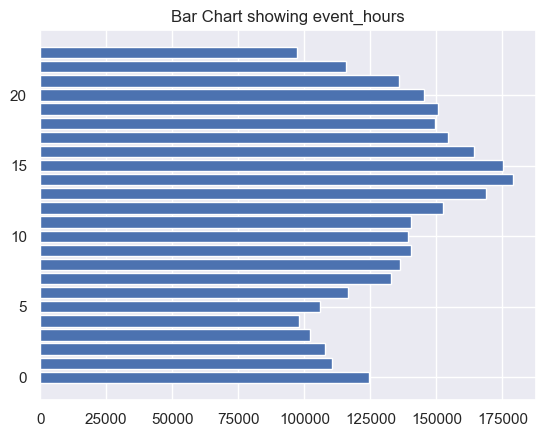

In [85]:
#plot a bar chart for the count of event_hours
x = no_of_hours['event_hour']
y = no_of_hours['count']

plt.barh(x,y)
plt.title("Bar Chart showing event_hours")
plt.show()

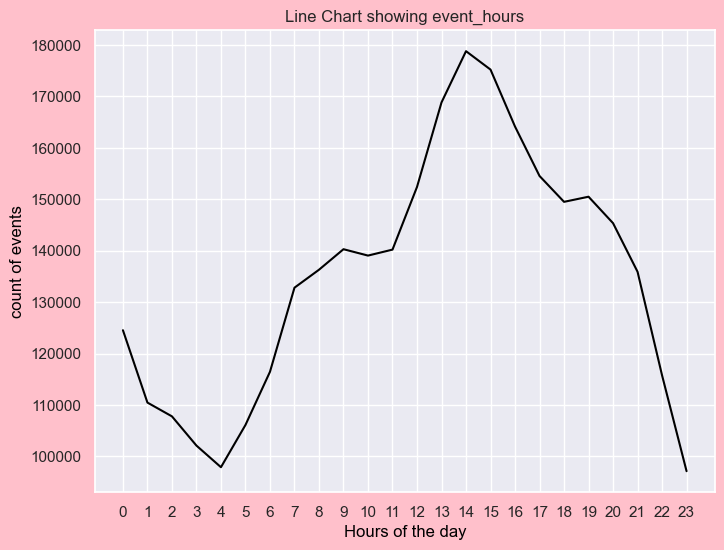

In [87]:
#plot a line chart for the count of event_hours
x = no_of_hours['event_hour']
y = no_of_hours['count']

plt.figure (figsize = (8,6), facecolor = 'pink')
plt.plot(x,y, color = 'black')
plt.xticks(list(range(24)))
plt.title("Line Chart showing event_hours")
plt.xlabel ('Hours of the day', fontsize = 12, c ='black')
plt.ylabel ('count of events', fontsize = 12, c ='black')
plt.show()

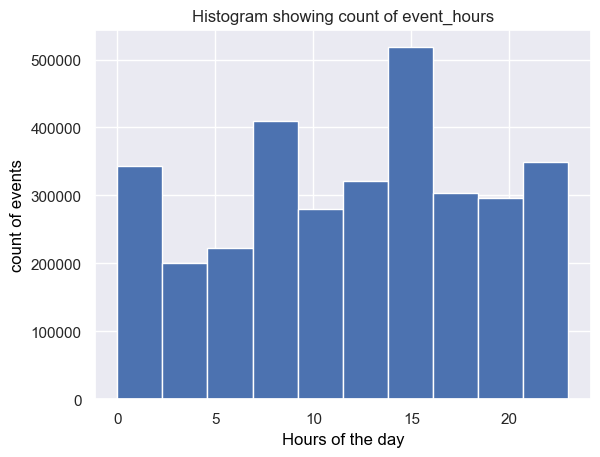

In [90]:
#plot a histogram of the distribution of the number of hours
plt.hist(dff['event_hour'])
plt.title("Histogram showing count of event_hours")
plt.xlabel ('Hours of the day', fontsize = 12, c ='black')
plt.ylabel ('count of events', fontsize = 12, c ='black')
plt.show()

In [91]:
# count of events during the period of day
day_period= dff['period of day'].value_counts().to_frame().reset_index()
day_period

,index,period of day
0,Afternoon,839437
1,Morning,805110
2,Night,618664
3,Early hours,524316
4,Evening,454549


In [95]:
day_period.columns = ['period of day', 'count of events']
day_period

,period of day,count of events
0,Afternoon,839437
1,Morning,805110
2,Night,618664
3,Early hours,524316
4,Evening,454549


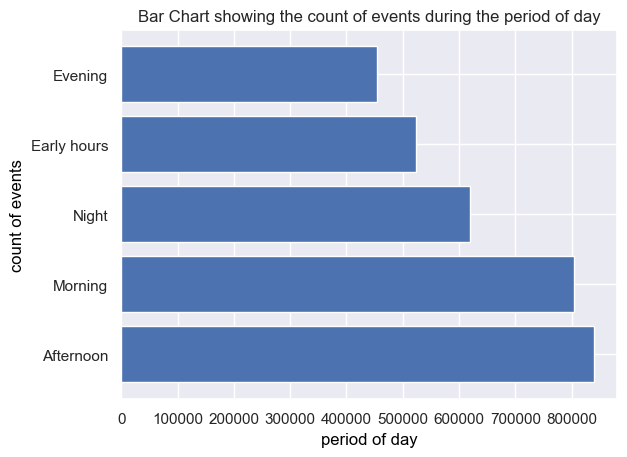

In [96]:
#plot a bar chart for count of events during the period of day
x = day_period['period of day']
y = day_period['count of events']

plt.barh(x,y)
plt.title("Bar Chart showing the count of events during the period of day")
plt.xlabel ('period of day', fontsize = 12, c ='black')
plt.ylabel ('count of events', fontsize = 12, c ='black')
plt.show()

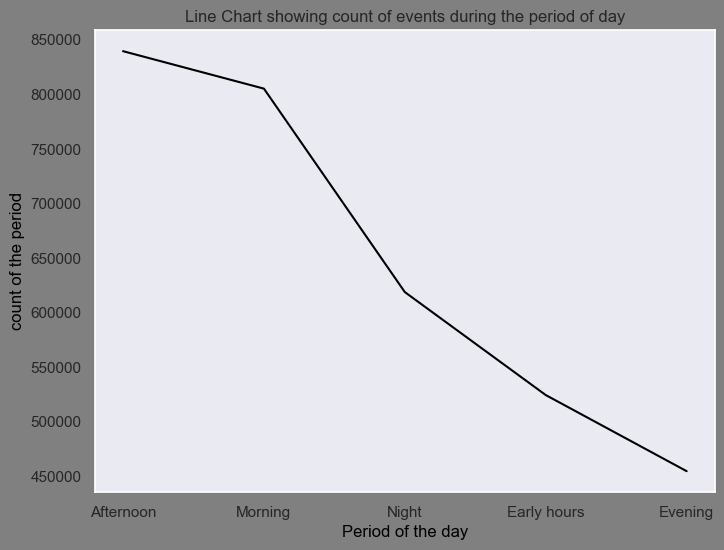

In [97]:
#plot a line chart for count of events during the period of day
x = day_period['period of day']
y = day_period['count of events']

plt.figure (figsize = (8,6), facecolor = 'grey')
plt.plot(x,y, color = 'black')
plt.title("Line Chart showing count of events during the period of day")
plt.xlabel ('Period of the day', fontsize = 12, c ='black')
plt.ylabel ('count of the period', fontsize = 12, c ='black')
plt.grid()

In [99]:
# freqency of events type at various period of the day
pd.crosstab (dff['event_type'], dff['period of day'])

period of day,Afternoon,Early hours,Evening,Morning,Night
event_type,,,,,
AddOrUpdateCoupon,298,200,185,270,324
AddProductOffering,1625,1065,987,1454,1380
BookmarkCreated,2624,1927,1509,2849,1991
CommentCreated,0,0,0,0,1
CrossReferenceTermOpened,8536,5353,5176,8401,6628
DashboardLivebookLinkOpened,12596,7474,7633,10949,9656
EBookDownloaded,73043,43260,44618,57630,58805
EBookRegistration,2208,1338,1485,1767,2044
ExerciseSolved,1500,1211,1003,1753,1504


In [100]:
# freqency of events type that occured at various event days
pd.crosstab(dff['event_type'],dff['event_day'])

event_day,1,2,3,4,5,6,7,8,9,10,...,22,23,24,25,26,27,28,29,30,31
event_type,,,,,,,,,,,,,,,,,,,,,
AddOrUpdateCoupon,43,44,35,33,45,37,29,55,65,54,...,47,37,29,49,44,38,37,62,38,40
AddProductOffering,190,172,141,121,151,160,127,179,204,243,...,205,269,262,310,328,198,250,272,262,152
BookmarkCreated,405,538,424,396,368,378,376,373,382,437,...,334,333,338,351,370,338,324,344,264,220
CommentCreated,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
CrossReferenceTermOpened,941,1109,1062,1082,1066,1363,1353,1234,1332,1193,...,1019,1123,1083,1006,985,1215,1067,989,826,604
DashboardLivebookLinkOpened,1589,1696,1528,1585,1135,1523,1254,1354,2195,1546,...,1311,1323,1574,1479,1555,1850,2096,1849,1468,937
EBookDownloaded,9866,8392,7516,6207,8421,9750,9106,7582,8627,10364,...,8276,9456,9931,9129,9423,8356,9221,9459,7895,6798
EBookRegistration,255,301,276,228,325,306,342,330,318,321,...,285,246,256,249,335,313,273,270,206,186
ExerciseSolved,229,324,239,239,244,265,261,281,296,251,...,226,217,163,189,224,217,194,234,133,131


In [102]:
# frequency of event_type at different event_hours
pd.crosstab (dff['event_type'], dff['event_hour'])

event_hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
event_type,,,,,,,,,,,,,,,,,,,,,
AddOrUpdateCoupon,47,49,40,32,36,43,28,52,33,58,...,59,65,66,53,49,83,68,77,94,38
AddProductOffering,211,219,226,207,218,195,219,225,239,245,...,323,323,327,313,328,346,327,298,287,257
BookmarkCreated,377,408,346,360,373,440,472,511,450,514,...,567,533,519,559,458,492,432,509,360,313
CommentCreated,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
CrossReferenceTermOpened,1081,1044,1040,1079,958,1232,1180,1191,1391,1434,...,1747,1820,1800,1787,1670,1719,1630,1626,1375,916
DashboardLivebookLinkOpened,1797,1516,1408,1430,1507,1613,1613,1509,1742,2005,...,2649,3130,2498,2516,2538,2579,2233,2403,1831,1392
EBookDownloaded,9135,9194,9028,8511,8255,8272,8401,9105,9628,9727,...,15567,15920,15392,15269,14701,14648,14333,13525,11817,9995
EBookRegistration,329,325,284,246,244,239,224,282,285,315,...,446,497,485,488,497,500,524,481,402,308
ExerciseSolved,217,199,181,280,284,267,312,290,251,314,...,226,296,365,344,343,316,342,362,334,249


In [108]:
dff[dff.account_id == 'b7d5902d66127909d0f9d766a841ebb5'].count()

account_id        344
event_time        344
event_type        344
product_id        344
event_date        344
time_event        344
event_year        344
event_month       344
event_day         344
event_day_name    344
event_hour        344
period of day     344
dtype: int64

In [103]:
# event carried out by account_id "b7d5902d66127909d0f9d766a841ebb5" during different event_categories
account_data= dff[dff['account_id'] == 'b7d5902d66127909d0f9d766a841ebb5']
account_data

,account_id,event_time,event_type,product_id,event_date,time_event,event_year,event_month,event_day,event_day_name,event_hour,period of day
2,b7d5902d66127909d0f9d766a841ebb5,2019-11-29 12:11:20.707,ReadingOwnedBook,1172,2019-11-29,12:11:20.707000,2019,11,29,Friday,12,Afternoon
9,b7d5902d66127909d0f9d766a841ebb5,2019-11-29 12:13:39.742,ReadingOwnedBook,1172,2019-11-29,12:13:39.742000,2019,11,29,Friday,12,Afternoon
71,b7d5902d66127909d0f9d766a841ebb5,2019-11-29 12:28:20.527,ReadingOwnedBook,855,2019-11-29,12:28:20.527000,2019,11,29,Friday,12,Afternoon
463,b7d5902d66127909d0f9d766a841ebb5,2019-11-29 13:48:46.590,ReadingOwnedBook,1172,2019-11-29,13:48:46.590000,2019,11,29,Friday,13,Afternoon
17092,b7d5902d66127909d0f9d766a841ebb5,2019-12-02 09:24:29.020,DashboardLivebookLinkOpened,1045,2019-12-02,09:24:29.020000,2019,12,2,Monday,9,Morning
...,...,...,...,...,...,...,...,...,...,...,...,...
3174604,b7d5902d66127909d0f9d766a841ebb5,2020-06-01 11:06:52.730,ReadingOwnedBook,871,2020-06-01,11:06:52.730000,2020,6,1,Monday,11,Morning
3227865,b7d5902d66127909d0f9d766a841ebb5,2020-06-03 13:50:01.687,DashboardLivebookLinkOpened,871,2020-06-03,13:50:01.687000,2020,6,3,Wednesday,13,Afternoon
3227897,b7d5902d66127909d0f9d766a841ebb5,2020-06-03 13:51:03.246,ReadingOwnedBook,871,2020-06-03,13:51:03.246000,2020,6,3,Wednesday,13,Afternoon
3227925,b7d5902d66127909d0f9d766a841ebb5,2020-06-03 13:52:03.122,ReadingOwnedBook,871,2020-06-03,13:52:03.122000,2020,6,3,Wednesday,13,Afternoon


In [110]:
# event carried out by account_id "b7d5902d66127909d0f9d766a841ebb5" during different event_categories
dff[dff["account_id"] == "b7d5902d66127909d0f9d766a841ebb5"]

,account_id,event_time,event_type,product_id,event_date,time_event,event_year,event_month,event_day,event_day_name,event_hour,period of day
2,b7d5902d66127909d0f9d766a841ebb5,2019-11-29 12:11:20.707,ReadingOwnedBook,1172,2019-11-29,12:11:20.707000,2019,11,29,Friday,12,Afternoon
9,b7d5902d66127909d0f9d766a841ebb5,2019-11-29 12:13:39.742,ReadingOwnedBook,1172,2019-11-29,12:13:39.742000,2019,11,29,Friday,12,Afternoon
71,b7d5902d66127909d0f9d766a841ebb5,2019-11-29 12:28:20.527,ReadingOwnedBook,855,2019-11-29,12:28:20.527000,2019,11,29,Friday,12,Afternoon
463,b7d5902d66127909d0f9d766a841ebb5,2019-11-29 13:48:46.590,ReadingOwnedBook,1172,2019-11-29,13:48:46.590000,2019,11,29,Friday,13,Afternoon
17092,b7d5902d66127909d0f9d766a841ebb5,2019-12-02 09:24:29.020,DashboardLivebookLinkOpened,1045,2019-12-02,09:24:29.020000,2019,12,2,Monday,9,Morning
...,...,...,...,...,...,...,...,...,...,...,...,...
3174604,b7d5902d66127909d0f9d766a841ebb5,2020-06-01 11:06:52.730,ReadingOwnedBook,871,2020-06-01,11:06:52.730000,2020,6,1,Monday,11,Morning
3227865,b7d5902d66127909d0f9d766a841ebb5,2020-06-03 13:50:01.687,DashboardLivebookLinkOpened,871,2020-06-03,13:50:01.687000,2020,6,3,Wednesday,13,Afternoon
3227897,b7d5902d66127909d0f9d766a841ebb5,2020-06-03 13:51:03.246,ReadingOwnedBook,871,2020-06-03,13:51:03.246000,2020,6,3,Wednesday,13,Afternoon
3227925,b7d5902d66127909d0f9d766a841ebb5,2020-06-03 13:52:03.122,ReadingOwnedBook,871,2020-06-03,13:52:03.122000,2020,6,3,Wednesday,13,Afternoon


In [111]:
# count of event_type that occured at different event_day_name
pd.crosstab (dff['event_type'], dff['event_day_name'])

event_day_name,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
event_type,,,,,,,
AddOrUpdateCoupon,135,210,150,201,181,206,194
AddProductOffering,969,999,822,850,984,993,894
BookmarkCreated,1309,1754,1285,1660,1463,1674,1755
CommentCreated,0,0,0,0,1,0,0
CrossReferenceTermOpened,4727,5502,3968,4270,4858,5442,5327
DashboardLivebookLinkOpened,6695,7503,5904,5838,7984,7074,7310
EBookDownloaded,41327,39915,34056,37601,42095,42325,40037
EBookRegistration,1287,1237,1158,1238,1313,1344,1265
ExerciseSolved,986,1176,845,1106,881,978,999


In [112]:
#grouping event_type by product_id
df.groupby(by='product_id')['event_type'].value_counts()

product_id  event_type                         
-1          FirstLivebookAccess                    658226
            FirstManningAccess                     657340
            LivebookLogin                           62484
            SearchMade                               8360
            LivebookRegistration                     7702
                                                    ...  
 1439       OrderConfirmationLivebookLinkOpened         2
            SearchMade                                  1
            SearchResultOpened                          1
 1838       ReadingOpenChapter                          2
            ReadingOwnedBook                            2
Name: event_type, Length: 8590, dtype: int64

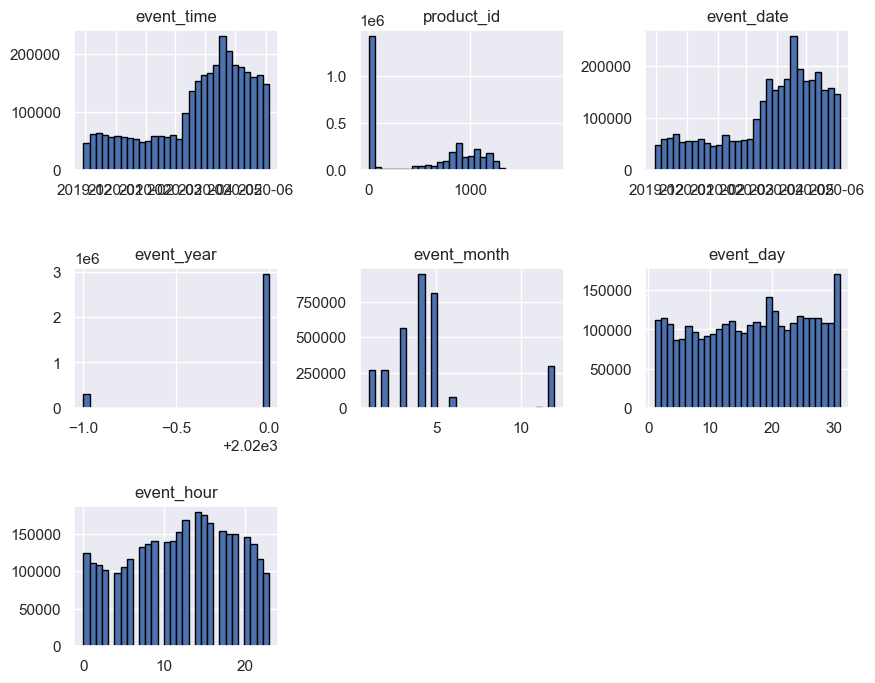

In [113]:
#checking for outliers
dff.hist(figsize=(10,8), bins=30, edgecolor="black")
plt.subplots_adjust(hspace=0.7, wspace=0.4)

In [115]:
features_of_interest = ["event_time", "product_id", "event_month", "event_year", "event_date"]
dff[features_of_interest].describe()

,product_id,event_month,event_year
count,3.242076e+06,3.242076e+06,3.242076e+06
mean,5.153777e+02,4.458935e+00,2.019906e+03
std,4.912778e+02,2.708621e+00,2.912558e-01
min,-1.000000e+00,1.000000e+00,2.019000e+03
25%,-1.000000e+00,3.000000e+00,2.020000e+03
50%,6.130000e+02,4.000000e+00,2.020000e+03
75%,9.710000e+02,5.000000e+00,2.020000e+03
max,1.838000e+03,1.200000e+01,2.020000e+03


Text(0.5, 1.0, 'Boxplot')

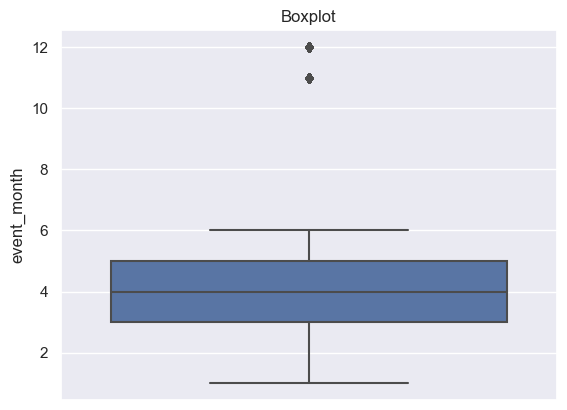

In [116]:
#Boxplot to examine outlier
import seaborn as sns
sns.boxplot(y=dff['event_month'])
plt.title('Boxplot')

Text(0.5, 1.0, 'Boxplot')

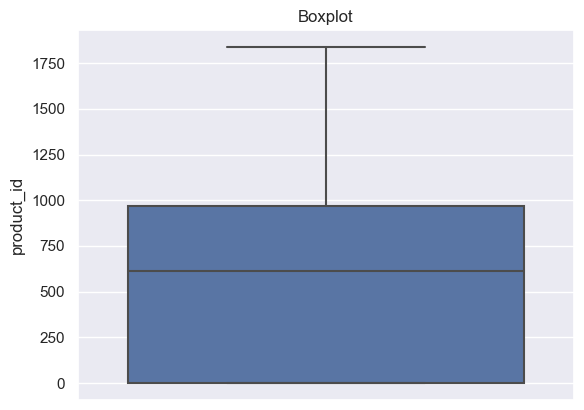

In [117]:
#Boxplot to examine outlier
import seaborn as sns
sns.boxplot(y=dff['product_id'])
plt.title('Boxplot')

In [118]:
dff['event_month'].unique()

array([11, 12,  1,  2,  3,  4,  5,  6], dtype=int64)

In [119]:
train,test = train_test_split(
    dff, test_size=0.2, 
    random_state=123)

In [120]:
train

,account_id,event_time,event_type,product_id,event_date,time_event,event_year,event_month,event_day,event_day_name,event_hour,period of day
1684099,4543731087e6aa6e4ae6700ac9e6f714,2020-04-10 21:49:25.551,HighlightCreated,803,2020-04-10,21:49:25.551000,2020,4,10,Friday,21,Night
2341405,6bb61e3b7bce0931da574d19d1d82c88,2020-04-30 15:35:32.117,FirstManningAccess,-1,2020-04-30,15:35:32.117000,2020,4,30,Thursday,15,Afternoon
471135,862b53b0c144913fcad3b128829b5f3e,2020-01-20 03:11:01.480,ReadingOwnedBook,508,2020-01-20,03:11:01.480000,2020,1,20,Monday,3,Early hours
770285,6bacc516b88b78d62e578cd9ad50c08b,2020-02-23 00:13:08.455,ReadingOwnedBook,860,2020-02-23,00:13:08.455000,2020,2,23,Sunday,0,Night
2093473,0cdb3d4983ada0ea811a88b79f95ab2e,2020-04-23 04:14:35.495,ReadingOpenChapter,1054,2020-04-23,04:14:35.495000,2020,4,23,Thursday,4,Early hours
...,...,...,...,...,...,...,...,...,...,...,...,...
1241052,77cf55972fd08e6aec1e36ace0456e58,2020-03-25 13:28:09.352,HighlightCreated,844,2020-03-25,13:28:09.352000,2020,3,25,Wednesday,13,Afternoon
3163458,3a3e982a76ef2ca5cc96bd1f67e10010,2020-05-31 23:55:18.084,LivebookLogin,-1,2020-05-31,23:55:18.084000,2020,5,31,Sunday,23,Night
28030,3162b3b8f051010b166de9756bbc1805,2019-12-03 15:51:04.419,ReadingOwnedBook,1156,2019-12-03,15:51:04.419000,2019,12,3,Tuesday,15,Afternoon
277869,af9d7afa98a18a8ea5fddd79d6d25dad,2019-12-29 11:03:11.766,ReadingOpenChapter,712,2019-12-29,11:03:11.766000,2019,12,29,Sunday,11,Morning


In [121]:
test

,account_id,event_time,event_type,product_id,event_date,time_event,event_year,event_month,event_day,event_day_name,event_hour,period of day
276661,03fe8c1ec0b22ab751f83235ff073ef7,2019-12-29 05:44:01.427,ReadingOwnedBook,855,2019-12-29,05:44:01.427000,2019,12,29,Sunday,5,Early hours
1414768,6bb61e3b7bce0931da574d19d1d82c88,2020-04-01 10:41:43.806,FirstLivebookAccess,-1,2020-04-01,10:41:43.806000,2020,4,1,Wednesday,10,Morning
2076222,510c0d270a5847c4f4380d57b751e90d,2020-04-22 14:37:59.153,ReadingOwnedBook,864,2020-04-22,14:37:59.153000,2020,4,22,Wednesday,14,Afternoon
1638660,41f0310dc531b359a06403537e9fb290,2020-04-09 12:46:26.452,LivebookLogin,-1,2020-04-09,12:46:26.452000,2020,4,9,Thursday,12,Afternoon
2636157,7b8cce5eacccf85352a5dd2f3b3c2bc5,2020-05-11 15:33:56.004,LivebookLogin,-1,2020-05-11,15:33:56.004000,2020,5,11,Monday,15,Afternoon
...,...,...,...,...,...,...,...,...,...,...,...,...
1799437,98c95442c2dd5569e462181720c54163,2020-04-14 23:11:01.974,LivebookLogin,-1,2020-04-14,23:11:01.974000,2020,4,14,Tuesday,23,Night
2129825,6bb61e3b7bce0931da574d19d1d82c88,2020-04-24 05:24:39.017,FirstManningAccess,-1,2020-04-24,05:24:39.017000,2020,4,24,Friday,5,Early hours
1978265,dcf9082a17123c1adc46b4f19dc90e6c,2020-04-19 23:48:11.104,EBookDownloaded,1159,2020-04-19,23:48:11.104000,2020,4,19,Sunday,23,Night
2262782,63bec4b91b8d69ad34191458b5442976,2020-04-28 09:16:59.278,SearchResultOpened,-1,2020-04-28,09:16:59.278000,2020,4,28,Tuesday,9,Morning


In [122]:
train.reset_index(drop=True, inplace = True)
train

,account_id,event_time,event_type,product_id,event_date,time_event,event_year,event_month,event_day,event_day_name,event_hour,period of day
0,4543731087e6aa6e4ae6700ac9e6f714,2020-04-10 21:49:25.551,HighlightCreated,803,2020-04-10,21:49:25.551000,2020,4,10,Friday,21,Night
1,6bb61e3b7bce0931da574d19d1d82c88,2020-04-30 15:35:32.117,FirstManningAccess,-1,2020-04-30,15:35:32.117000,2020,4,30,Thursday,15,Afternoon
2,862b53b0c144913fcad3b128829b5f3e,2020-01-20 03:11:01.480,ReadingOwnedBook,508,2020-01-20,03:11:01.480000,2020,1,20,Monday,3,Early hours
3,6bacc516b88b78d62e578cd9ad50c08b,2020-02-23 00:13:08.455,ReadingOwnedBook,860,2020-02-23,00:13:08.455000,2020,2,23,Sunday,0,Night
4,0cdb3d4983ada0ea811a88b79f95ab2e,2020-04-23 04:14:35.495,ReadingOpenChapter,1054,2020-04-23,04:14:35.495000,2020,4,23,Thursday,4,Early hours
...,...,...,...,...,...,...,...,...,...,...,...,...
2593655,77cf55972fd08e6aec1e36ace0456e58,2020-03-25 13:28:09.352,HighlightCreated,844,2020-03-25,13:28:09.352000,2020,3,25,Wednesday,13,Afternoon
2593656,3a3e982a76ef2ca5cc96bd1f67e10010,2020-05-31 23:55:18.084,LivebookLogin,-1,2020-05-31,23:55:18.084000,2020,5,31,Sunday,23,Night
2593657,3162b3b8f051010b166de9756bbc1805,2019-12-03 15:51:04.419,ReadingOwnedBook,1156,2019-12-03,15:51:04.419000,2019,12,3,Tuesday,15,Afternoon
2593658,af9d7afa98a18a8ea5fddd79d6d25dad,2019-12-29 11:03:11.766,ReadingOpenChapter,712,2019-12-29,11:03:11.766000,2019,12,29,Sunday,11,Morning


In [123]:
test.reset_index(drop=True, inplace = True)
test

,account_id,event_time,event_type,product_id,event_date,time_event,event_year,event_month,event_day,event_day_name,event_hour,period of day
0,03fe8c1ec0b22ab751f83235ff073ef7,2019-12-29 05:44:01.427,ReadingOwnedBook,855,2019-12-29,05:44:01.427000,2019,12,29,Sunday,5,Early hours
1,6bb61e3b7bce0931da574d19d1d82c88,2020-04-01 10:41:43.806,FirstLivebookAccess,-1,2020-04-01,10:41:43.806000,2020,4,1,Wednesday,10,Morning
2,510c0d270a5847c4f4380d57b751e90d,2020-04-22 14:37:59.153,ReadingOwnedBook,864,2020-04-22,14:37:59.153000,2020,4,22,Wednesday,14,Afternoon
3,41f0310dc531b359a06403537e9fb290,2020-04-09 12:46:26.452,LivebookLogin,-1,2020-04-09,12:46:26.452000,2020,4,9,Thursday,12,Afternoon
4,7b8cce5eacccf85352a5dd2f3b3c2bc5,2020-05-11 15:33:56.004,LivebookLogin,-1,2020-05-11,15:33:56.004000,2020,5,11,Monday,15,Afternoon
...,...,...,...,...,...,...,...,...,...,...,...,...
648411,98c95442c2dd5569e462181720c54163,2020-04-14 23:11:01.974,LivebookLogin,-1,2020-04-14,23:11:01.974000,2020,4,14,Tuesday,23,Night
648412,6bb61e3b7bce0931da574d19d1d82c88,2020-04-24 05:24:39.017,FirstManningAccess,-1,2020-04-24,05:24:39.017000,2020,4,24,Friday,5,Early hours
648413,dcf9082a17123c1adc46b4f19dc90e6c,2020-04-19 23:48:11.104,EBookDownloaded,1159,2020-04-19,23:48:11.104000,2020,4,19,Sunday,23,Night
648414,63bec4b91b8d69ad34191458b5442976,2020-04-28 09:16:59.278,SearchResultOpened,-1,2020-04-28,09:16:59.278000,2020,4,28,Tuesday,9,Morning


In [124]:
# Define function to remove outliers
def drop_outlier(data,var):
    q1, q3 = np.percentile(data[var], [25, 75])
    iqr = q3 - q1
    lower = q1 - 1.5*iqr
    upper = q3 + 1.5*iqr
    data = data[data[var]< upper]
    data = data[data[var]> lower]
    data.reset_index(drop=True, inplace = True)
    return data

In [125]:
#drop outliers in event_month 
train = drop_outlier(train,'event_month')

{'whiskers': [<matplotlib.lines.Line2D at 0x1ebe6773550>,
 'caps': [<matplotlib.lines.Line2D at 0x1ebe6773af0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1ebe6773280>],
 'medians': [<matplotlib.lines.Line2D at 0x1ebe677e0d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1ebe677e3a0>],
 'means': []}

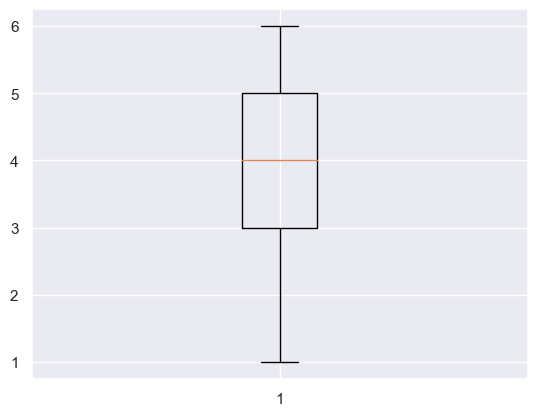

In [126]:
plt.boxplot(train['event_month'])

<AxesSubplot:xlabel='event_month', ylabel='Density'>

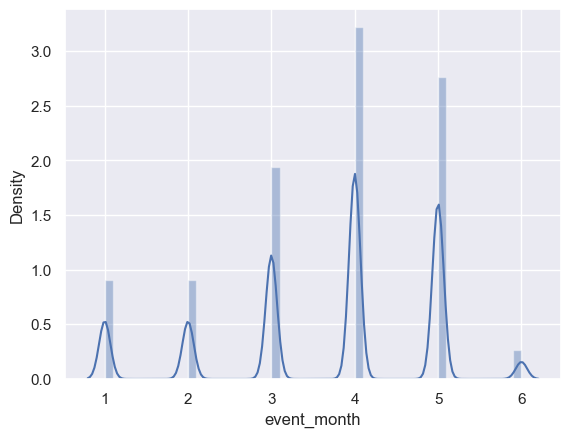

In [127]:
sns.distplot(train['event_month'])